In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
import sqlite3
conn = sqlite3.connect(':memory:')

In [5]:
df = pd.read_csv("GAS_PRICES(1995-2021).csv")
df.to_sql('df', conn, index=False, if_exists='replace')

1361

In [6]:
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [12]:
query = '''
SELECT substr(Date, 7, 4) AS year, AVG(R1) AS R1
FROM df
GROUP BY substr(Date, 7, 4)
'''    
    
df1 = pd.read_sql_query(query, conn)

In [14]:
df1.head(40)

,year,R1
0,1995,1.110865
1,1996,1.199075
2,1997,1.199038
3,1998,1.029654
4,1999,1.135808
5,2000,1.483808
6,2001,1.420057
7,2002,1.344500
8,2003,1.561096
9,2004,1.852212


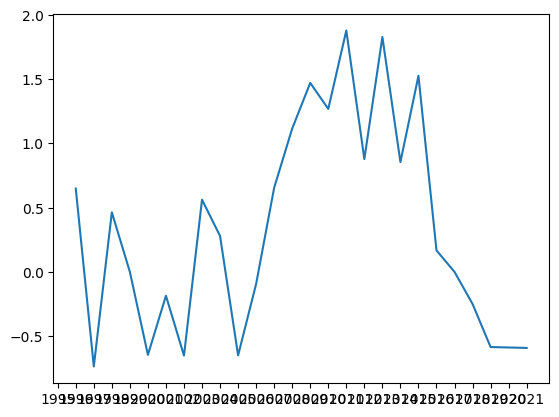

In [16]:
df1['r1_percent_change'] = df['R1'].pct_change() * 100

plt.plot(df1['year'], df1['r1_percent_change'])